# Tutorial QSAR models
This script was used to create the QSPRpred QSAR models used in the other tutorials. 
Make sure you have downloaded the tutorial data, if you want to reproduce the QSAR models.

### Classification model to predict A2AR receptor binding affinity

In [1]:
# Load in the raw data
import pandas as pd

DATASETS_PATH = 'data/data'

df = pd.read_csv(f'{DATASETS_PATH}/A2AR_LIGANDS.tsv', sep='\t', header=0, na_values=('NA', 'nan', 'NaN'))
df

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,type_other,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD
0,AACWUFIIMOHGSO_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.91968,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,AACWUFIIMOHGSO,AACWUFIIMOHGSO-UHFFFAOYSA-N,InChI=1S/C19H24N6O2/c1-12-10-13(2)25(23-12)17-...,"""AuxInfo=1/1/N:1,26,22,14,15,20,19,11,12,27,6,...",P29274_WT,...,NaN,NaN,=,8.68,8.68,0.0,0.0,1.0,8.68,0.0
1,AAEYTMMNWWKSKZ_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.131451,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,AAEYTMMNWWKSKZ,AAEYTMMNWWKSKZ-UHFFFAOYSA-N,InChI=1S/C18H16N4O3S/c19-15-13-9-10-3-1-2-4-14...,"""AuxInfo=1/1/N:22,23,21,24,8,15,9,14,19,20,7,1...",P29274_WT,...,NaN,NaN,=,4.82,4.82,0.0,0.0,1.0,4.82,0.0
2,AAGFKZWKWAMJNP_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.100375,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,AAGFKZWKWAMJNP,AAGFKZWKWAMJNP-UHFFFAOYSA-N,InChI=1S/C21H14N6O2/c28-20(14-8-3-1-4-9-14)24-...,"""AuxInfo=1/1/N:27,19,26,28,18,20,9,25,29,17,21...",P29274_WT,...,NaN,NaN,=,5.65,5.65,0.0,0.0,1.0,5.65,0.0
3,AANUKDYJZPKTKN_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.123484,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,AANUKDYJZPKTKN,AANUKDYJZPKTKN-UHFFFAOYSA-N,InChI=1S/C28H31ClN6O5/c1-30-27(39)28-13-18(28)...,"""AuxInfo=1/1/N:1,25,18,19,17,20,35,36,34,16,21...",P29274_WT,...,NaN,NaN,=,5.45,5.45,0.0,0.0,1.0,5.45,0.0
4,AASXHCGIIQCKEE_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.419145,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,AASXHCGIIQCKEE,AASXHCGIIQCKEE-UHFFFAOYSA-N,InChI=1S/C24H27N5O6S/c1-4-12-29-23(31)20-21(26...,"""AuxInfo=1/1/N:1,14,30,2,20,26,34,27,33,15,21,...",P29274_WT,...,NaN,NaN,=,5.2,5.20,0.0,0.0,1.0,5.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,ZYXGKENMDDPQIE_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.399078,CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12,ZYXGKENMDDPQIE,ZYXGKENMDDPQIE-UHFFFAOYSA-N,InChI=1S/C19H18N6O3/c1-20-19-22-11-14(17-23-16...,"""AuxInfo=1/1/N:1,16,24,23,12,18,13,17,25,10,5,...",P29274_WT,...,NaN,NaN,=,7.09,7.09,0.0,0.0,1.0,7.09,0.0
4078,ZYZWFDVXMLCIOU_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.94689,Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1,ZYZWFDVXMLCIOU,ZYZWFDVXMLCIOU-UHFFFAOYSA-N,InChI=1S/C18H16N6O2/c19-17-22-14(13-7-4-10-26-...,"""AuxInfo=1/1/N:22,21,23,7,20,24,6,18,17,8,12,1...",P29274_WT,...,NaN,NaN,=,8.22,8.22,0.0,0.0,1.0,8.22,0.0
4079,ZZBZWSYDXUPJCT_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.131461,Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1,ZZBZWSYDXUPJCT,ZZBZWSYDXUPJCT-UHFFFAOYSA-N,InChI=1S/C12H11FN8S2/c13-6-1-3-7(4-2-6)16-11-1...,"""AuxInfo=1/1/N:8,11,7,12,15,9,6,14,2,20,4,17,1...",P29274_WT,...,NaN,NaN,=,4.89,4.89,0.0,0.0,1.0,4.89,0.0
4080,ZZMIPZLRKFEGIA_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.202018,CCCOc1ccc(C=Cc2cc3c(c(=O)n(C)c(=O)n3C)n2C)cc1,ZZMIPZLRKFEGIA,ZZMIPZLRKFEGIA-UHFFFAOYSA-N,InChI=1S/C20H23N3O3/c1-5-12-26-16-10-7-14(8-11...,"""AuxInfo=1/0/N:1,24,22,18,2,9,7,25,10,6,26,3,1...",P29274_WT,...,NaN,NaN,=,6.51,6.51,0.0,0.0,1.0,6.51,0.0


In [3]:
import os
from qsprpred.data import QSPRDataset
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data.sampling.splits import ScaffoldSplit
from qsprpred.tasks import TargetTasks

DATA_PATH_QSAR = "data/data/qsar"
os.makedirs(DATA_PATH_QSAR, exist_ok=True)

# create the data set
dataset = QSPRDataset(
    name="A2AR",
    df=df.copy(), 
    target_props=[{"name" : "pchembl_value_Median", "task" : TargetTasks.SINGLECLASS, "th": [6.5]}], 
    store_dir=DATA_PATH_QSAR,
)

# split on scaffolds
split = ScaffoldSplit(test_fraction=0.2)

dataset.prepareDataset(
    split=split,
    feature_calculators=[MorganFP(radius=3, nBits=2048)]
)

print(f"Number of samples train set: {len(dataset.y)}")
print(f"Number of samples test set: {len(dataset.y_ind)}, {len(dataset.y_ind) / len(dataset.df) * 100}%")

Number of samples train set: 2977
Number of samples test set: 1105, 27.070063694267514%


In [4]:
# A small example of how to optimize hyperparameters for a model
from qsprpred.models import CrossValAssessor
from qsprpred.models.scikit_learn import SklearnModel
from qsprpred.models.hyperparam_optimization import GridSearchOptimization
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators' : [50, 250],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    "n_jobs": [1]
}

model = SklearnModel(
    name="A2AR_RandomForestClassifier",
    base_dir='data/models/qsar/',
    alg = RandomForestClassifier
)

gridsearcher = GridSearchOptimization(param_grid=params, model_assessor=CrossValAssessor(scoring='roc_auc'))
best_params = gridsearcher.optimize(model, dataset)
best_params

{'criterion': 'entropy', 'n_estimators': 250, 'n_jobs': 1}

In [ ]:
# A small example of how to assess a model
from qsprpred.models.assessment.methods import CrossValAssessor, TestSetAssessor

CrossValAssessor(scoring='roc_auc')(model, dataset)
TestSetAssessor(scoring='roc_auc')(model, dataset)
_ = model.fitDataset(dataset)

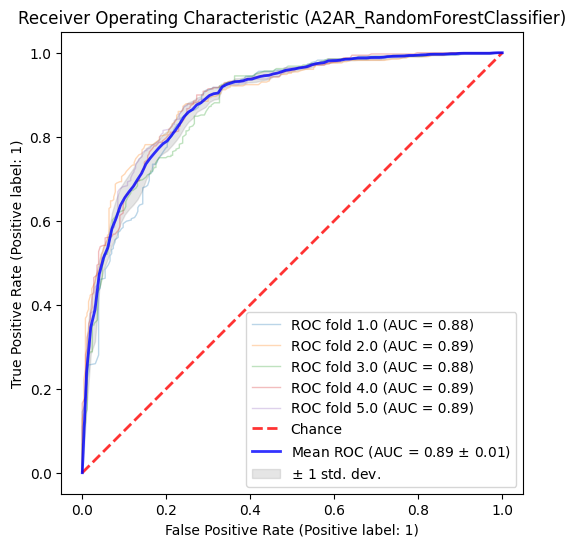

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [6]:
# Visualize the results
from qsprpred.plotting.classification import ROCPlot

plot = ROCPlot([model])
plot.make(property_name="pchembl_value_Median", validation='cv', save = True, show=True)

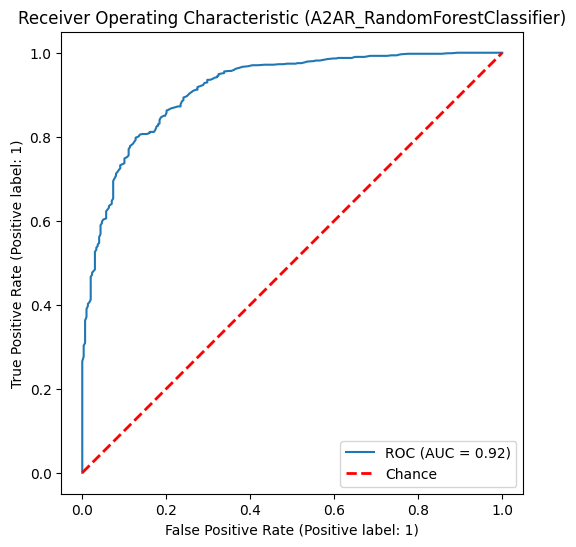

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [7]:
plot = ROCPlot([model])
plot.make(property_name="pchembl_value_Median", validation='ind', save = True, show=True)

In [8]:
# How to use the model to predict values for new molecules
sample_inputs = [
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C', # caffeine
    'c1ccccc1CCN1N=CC2=C1N=C(N)N3C2=NC(C4=CC=CO4)=N3' # SCH-58261 (50x more selective to A2A than caffeine -> more potent)
]

model.predictMols(sample_inputs, use_probas=True)

In [10]:
## This is how you can reload the model and make predictions
from qsprpred.models.scikit_learn import SklearnModel

predictor = SklearnModel(
    name='A2AR_RandomForestClassifier',
    base_dir='./data/models/qsar'
)

predictor.predictMols(sample_inputs, use_probas=True)

[array([[0.756, 0.244],
        [0.008, 0.992]])]

In [12]:
# Here is a small example of how to use the QSPRPredScorer in DrugEx
# more information can be found in the Sequence-RNN tutorial and the
# advanced/multitask_scorers tutorial
from drugex.training.scorers.qsprpred import QSPRPredScorer

qsprpred_scorer = QSPRPredScorer(
    predictor
)

qsprpred_scorer.getScores(sample_inputs)

array([0.244, 0.992])

We can predict back the dataset values and compare the results with the original dataset.

In [13]:
qsprpred_scorer.getScores(dataset.getDF().SMILES.values[:10]) > 0.5

array([ True, False, False, False, False,  True, False, False,  True,
       False])

In [14]:
dataset.getDF().pchembl_value_Median.values[:10]

array([ True, False, False, False, False,  True, False, False,  True,
       False])

### Multi-class classification model
This multi-class classification model is used as an example in the
advanced multitask scorers tutorial.

In [16]:
import os
from qsprpred.data import QSPRDataset
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data.sampling.splits import ScaffoldSplit
from qsprpred.tasks import TargetTasks

DATA_PATH_QSAR = "data/data/qsar"
os.makedirs(DATA_PATH_QSAR, exist_ok=True)

# create the data set
dataset = QSPRDataset(
    name="A2AR_multiclass",
    df=df.copy(), 
    target_props=[{"name" : "pchembl_value_Median", "task" : TargetTasks.MULTICLASS, "th": [0, 5.5, 7, 12]}], 
    store_dir=DATA_PATH_QSAR,
)

# split on scaffolds
split = ScaffoldSplit(test_fraction=0.2)

dataset.prepareDataset(
    split=split,
    feature_calculators=[MorganFP(radius=3, nBits=2048)]
)

print(f"Number of samples train set: {len(dataset.y)}")
print(f"Number of samples test set: {len(dataset.y_ind)}, {len(dataset.y_ind) / len(dataset.df) * 100}%")

Number of samples train set: 3293
Number of samples test set: 789, 19.32876041156296%


In [ ]:
# Train the model
from qsprpred.models.scikit_learn import SklearnModel
from sklearn.ensemble import RandomForestClassifier
from qsprpred.models.assessment.methods import CrossValAssessor, TestSetAssessor

model = SklearnModel(
    name="A2AR_RandomForestMultiClassClassifier",
    base_dir='data/models/qsar/',
    alg = RandomForestClassifier
)

CrossValAssessor(scoring='roc_auc_ovr')(model, dataset)
TestSetAssessor(scoring='roc_auc_ovr')(model, dataset)
_ = model.fitDataset(dataset)

A2AR_RandomForestMultiClassClassifier


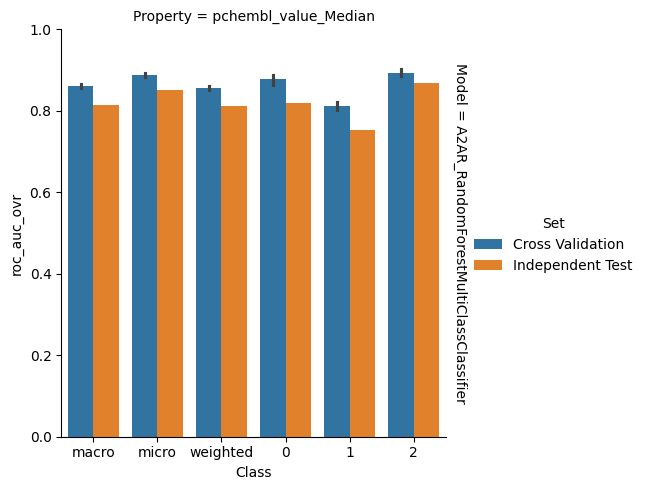

<Figure size 640x480 with 0 Axes>

In [21]:
from qsprpred.plotting.classification import MetricsPlot

plot = MetricsPlot([model], metrics=["roc_auc_ovr"])
figs, summary = plot.make(save=True, show=True)

### Multi-task regression model
This multi-task regression model is used as an example in the
advanced multitask scorers tutorial.

In [28]:
# create a multitask dataset
import pandas as pd
from sklearn.impute import SimpleImputer
from qsprpred.data import QSPRDataset


df_multitask = pd.read_csv(f'{DATASETS_PATH}/AR_LIGANDS.tsv', sep='\t', header=0, na_values=('NA', 'nan', 'NaN'))
df_multitask = df_multitask.pivot(
    index="SMILES",
    columns="accession",
    values="pchembl_value_Mean"
)
df_multitask.columns.name = None
df_multitask.reset_index(inplace=True)

# Specify the target properties (A1, A2A, A2B, A3)
target_props = [
    {"name": "P0DMS8", "task": "REGRESSION", "imputer": SimpleImputer(strategy="mean")},
    {"name": "P29274", "task": "REGRESSION", "imputer": SimpleImputer(strategy="mean")},
    {"name": "P29275", "task": "REGRESSION", "imputer": SimpleImputer(strategy="mean")},
    {"name": "P30542", "task": "REGRESSION", "imputer": SimpleImputer(strategy="mean")}]

# create the data set
dataset = QSPRDataset(
    name="AR_multitask",
    df=df_multitask.copy(), 
    target_props=target_props,
    store_dir=DATA_PATH_QSAR,
    random_state=42
)

# split on scaffolds
split = ScaffoldSplit(test_fraction=0.2)

dataset.prepareDataset(
    split=split,
    feature_calculators=[MorganFP(radius=3, nBits=2048)]
)

print(f"Number of samples train set: {len(dataset.y)}")
print(f"Number of samples test set: {len(dataset.y_ind)}, {len(dataset.y_ind) / len(dataset.df) * 100}%")

Number of samples train set: 4878
Number of samples test set: 1919, 28.233043989995586%


In [ ]:
# Train the model
from qsprpred.models.scikit_learn import SklearnModel
from sklearn.ensemble import RandomForestRegressor
from qsprpred.models.assessment.methods import CrossValAssessor, TestSetAssessor

model = SklearnModel(
    name="AR_RandomForestMultiTaskRegressor",
    base_dir='data/models/qsar/',
    alg = RandomForestRegressor
)

CrossValAssessor(scoring='r2')(model, dataset)
TestSetAssessor(scoring='r2')(model, dataset)
_ = model.fitDataset(dataset)

AR_RandomForestMultiTaskRegressor


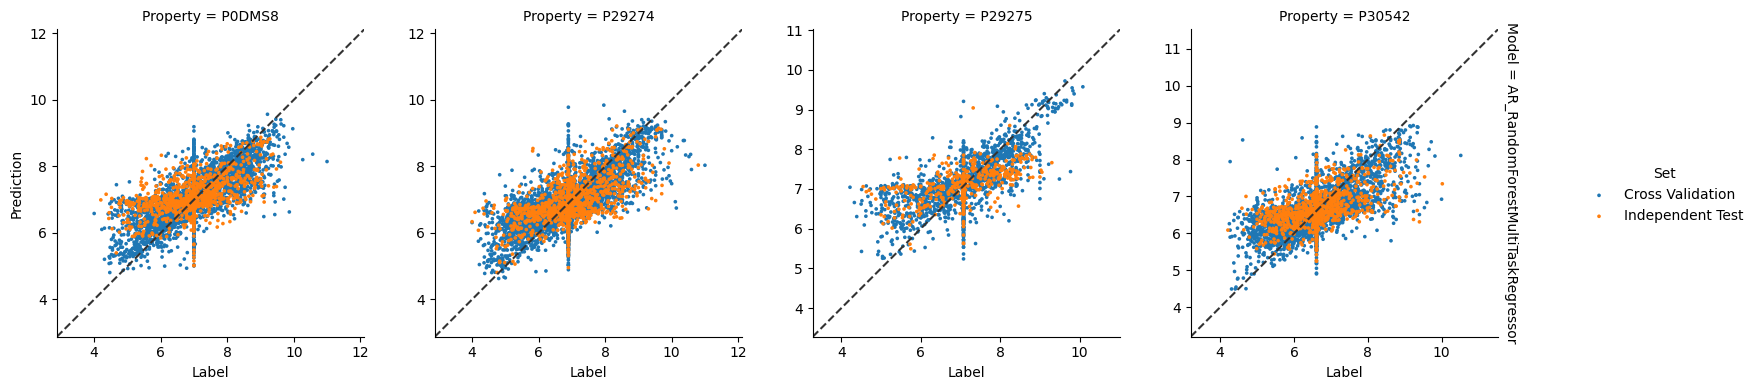

<Figure size 640x480 with 0 Axes>

In [30]:
# Visualize the results
from qsprpred.plotting.regression import CorrelationPlot

plot = CorrelationPlot([model])
axes, summary = plot.make(save=False, show=True)

### Note one QSPRpred
QSPRpred is a Python package for QSAR modeling.
It is available at https://github.com/CDDLeiden/QSPRpred.
There you will also find more detailed tutorials on how to use the package.